#**HW1-FRA503 Machine Learning**
#ตัวอย่างการเขียนรายงานสำหรับ Homework
#(The template report for homework)

#**Objective Goals**
The purposes of this project are:

  1. to gain experience with data preprocessing including data observation, data cleaning, feature selection and feature extraction.
  2. to gain skills with Python coding for data analysis, model construction and result analysis.

#**Due date**
Tuesday 21/9/2021

#**Instructions**
1. You have to work on this project in pairs with classmates.
2. You must use the Python notebook (files.ipynb) for your written report to explain the processes of building the machine learning models.
3. The report must contain the contents following “Project Assignments”.
4. You can use English or Thai to write the report.
5. The dataset for this homework can be found in the following link:
https://docs.google.com/document/d/1YhZECyI-WTAlY2JxshYkxws5SZWtmHbCxABxWiXc1As/edit?usp=sharing 

**Noted:** You can use read_csv() in Pandas to read this dataset via this link directly.



#**Project Assignments**
Your notebook must contain the following contents:

###**1. Data Exploration**
- How many attributes in the dataset
- Observations of good and bad things about the dataset 
- List of all attributes that you would keep or remove from the dataset and why 

###**2. Data Preprocessing**
- Missing Values
- Feature Selection 
- Feature extraction

###**3. Model Construction and Analysis (Linear and Logistic regression model)**
- Code (Python) description for building the Linear and Logistic regression model
- Experimentation with different preprocessing
- Experimentation with different testing modes
- Presentation of resulting model and evaluation
- Observations and analysis of results




#**The Template Report for Homework 1**
This is an example of writing the report for constructing the logistic regression model.

###**1. Data Exploration**
The dataset that will be used for analysis and modeling machine learning is taken from https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/classification_2classes.csv .

Import Pandas to process the dataset.

This dataset contains two regular attributes (X and Y) and one spacial attribute labeled to class 0 and 1.

**You can elaborate more on your dataset such as the number and the meaning of attributes or problems arising in the dataset before using in the modeling.**


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/classification_2classes.csv')
df.head()

,X,Y,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


This daset is explained through the following statistical values using describe(): **(You should explain the details more)**

In [ ]:
df.describe()

,X,Y,Label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


The dataset is visualized to explain the relationship between X attribute and Y attribute via the below graph containing the two classes of 0 (green triangle) and 1 (red cross).

**You can further explain the nature of the dataset displayed.**

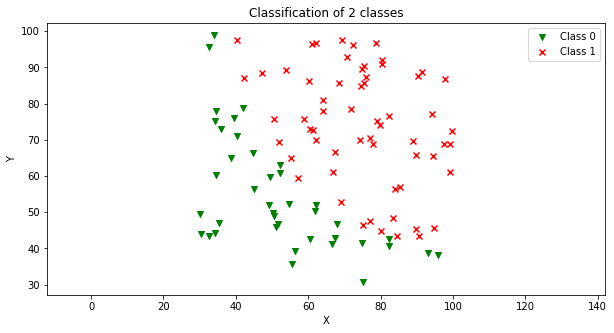

In [ ]:
import matplotlib.pyplot as plt
group0 = df[df['Label']==0]
group1 = df[df['Label']==1]
plt.figure(figsize=(10,5))
plt.title("Classification of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1')
plt.legend(loc='upper right')
plt.show()

###**2. Data Preprocessing**

Import the Scikit Learn train_test_split module to split the data to tain (90%) and test (10%).

Import the Scikit Learn MinMaxScaler to scale the data in range 0-1. **(you can give more reasons for using this method)**

**If you are using more than one method to preprocess data, you need to elaborate more.**

In [ ]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x = df[['X','Y']].values
y = df['Label'].values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.1,random_state = 0)

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (90, 2)
y_train shape (90,)
X_test shape (10, 2)
y_test shape (10,)


###**3. Model Construction and Analysis**

###**- Logistic regression Construction:**
Import the Scikit Learn Logistic Regression module.

Fit model on the train set using fit() then perform prediction on train and test set using prediction.

The logistic regression tries to minimize the cost function (cross entropy): $-(y^{i}log(h(\vec x^{(i)}))+(1-y^{i})log(1-h(\vec x^{(i)})))$.

In [ ]:
#Build linear regression model
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The fitted model is used to predict on train set and test set by predict()

In [ ]:
#Predict on training set
y_pred_train = model_logistic.predict(x_train)
#Predict on testing set
y_pred_test = model_logistic.predict(x_test)

After fitting the model, the parameters of the logistic regression model are shown by using .intercept_ and .coef_. The linear equation explaining the classification of class 0 and 1 of this model is $0 =-2.4453+2.7983x+2.8939y$  showing via the blue line segments in the below plot.

**(You can further comment on the graphs that you display.)**

In [ ]:
# = theta0 + theta1*x _theta2*y
print("Theta0: ",model_logistic.intercept_[0])
print("Theta1: ",model_logistic.coef_[0][0])
print("Theta2: ",model_logistic.coef_[0][1])
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(model_logistic.intercept_[0],model_logistic.coef_[0][0],model_logistic.coef_[0][1]))

Theta0:  -2.445305729360579
Theta1:  2.798270938202645
Theta2:  2.893886672145913
0 = -2.4453+2.7983x+2.8939y


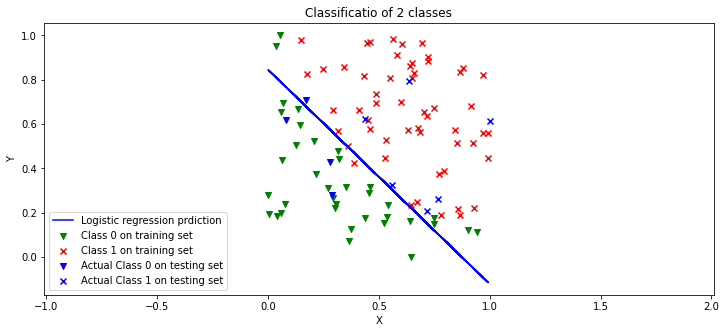

In [ ]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group0_test = df_testing[df_testing['Label']==0]
group1_test = df_testing[df_testing['Label']==1]

plt.figure(figsize=(12,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
plt.plot(df_training['X'].values,(model_logistic.intercept_[0]+model_logistic.coef_[0][0]*df_training['X'].values)/((-1)*model_logistic.coef_[0][1]),'-b',label="Logistic regression prdiction")
plt.scatter(group0_test['X'],group0_test['Y'],marker='v',c='b',label='Actual Class 0 on testing set')
plt.scatter(group1_test['X'],group1_test['Y'],marker='x',c='b',label='Actual Class 1 on testing set')
plt.legend(loc="lower left")
plt.show()


###**- Result analysis:**

**You can design a sequence of describing the results of the experiments based on your chosen topic. This is just an example.**

Import the Scikit Learn metrics module to analyze the results using classification_report, confusion_matrix and plot_confusion_matrix.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

The precision, recall and the f1-scores of the expiremental results on traning set are shown below **(You need to elaborate more details and meaning of the values shown to explain what is happening in the experimental results.)** 

In [ ]:
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred_train))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred_train))

Classification report 
              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.90      0.98      0.94        54

    accuracy                           0.92        90
   macro avg       0.93      0.91      0.92        90
weighted avg       0.93      0.92      0.92        90

Confusion matrix 
[[30  6]
 [ 1 53]]


In addition, the confusion matrix is used to descibe the performance on the logistic regression model building on the trainig set. **(You should describe in detail of the results of the confusion matrix displayed.)**



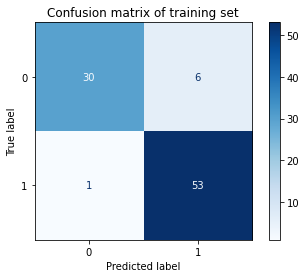

In [ ]:
# Plot confusion matrix of training set
plot_confusion_matrix(model_logistic,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

The precision, recall and the f1-scores of the expiremental results on test set are shown below **(You need to elaborate more details and meaning of the values shown to explain what is happening in the experimental results.)** 

In [ ]:
# Classification report of test set
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred_test))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred_test))

Classification report 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

Confusion matrix 
[[3 1]
 [0 6]]


In addition, the confusion matrix is used to descibe the performance on the logistic regression model  building on the test set. **(You should describe in detail of the results of the confusion matrix displayed.)**

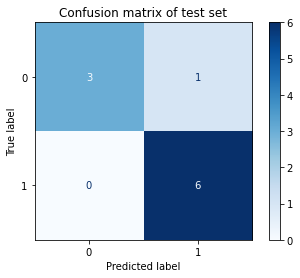

In [ ]:
# Plot confusion matrix of test set
plot_confusion_matrix(model_logistic,
                      x_test,
                      y_test,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 